# Assignment 2 - Machine Learning Basics

## Vignesh Kumaresan
Netid:  vk77

Github link: https://github.com/vkumaresan/ECE590

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

### 1
If we have a large sample size, then it is generally better to employ a flexible learning method. This is because the sample size can reduce our risk of overfitting, and we can extract more information from a flexible approach, since we have more data.

### 2
This is the inverse of (1), and thus an inflexible approach is better. With a low sample size, we have a higher risk of overfitting to the data, so an inflexible modle would be better here.

### 3
We would prefer a flexible learning method for this example, since inflexible methods are best when used for linear relationships. 

### 4
We would prefer an inflexible learning method here, since a high variance indicates that a flexible learning method is more likely to overfit to the noise in the data.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

### a
(i) This scenario is a regression problem, since our outcome variable (CEO salary) is a continuous variable.

(ii) We are interested in inference for this problem, since we want to understand how these factors affect our outcome variable.

(iii) n = 500(firms), p = 3(profit, number of employees, industry)

### b
(i) This scenario is a classification problem, since our outcome variable is a binary flag (success or failure).

(ii) We are interested in prediction for this problem, since we are attempting to predict if a new product is a success or a failure.

(iii) n = 20 (similar products), p = 13(product price, marketing budget, competition price, ten others)

### c
(i) This scenario is a regression problem, since our outcome variable (% change) is a continuous variable.

(ii) We are interested in prediction for this problem, since we want to predict the % change in relation to other factors. 

(iii) n = 52 (weeks in a year), p = 3 (% change US, % change British, % change German)

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [50]:
import numpy as np
from collections import Counter
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        return
    
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.X_train = x
        self.y_train = y
        return 
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        
        # loop through test data and calculate Euclidean distance
        for i in x:
            diff = i - self.X_train
            diff_squared = diff * diff
            distances = np.sum(diff_squared, axis=1)
            # get location of nearest neighbor and add the majority vote candidate to our list
            idx = np.argpartition(distances, k)[:k]
            nearest_dists = np.take(self.y_train, idx)
            y_hat.append(mode(nearest_dists,axis=0)[0][0])
        y_hat = np.array(y_hat)
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [8]:
# b
# load datasets
X_test_high = np.genfromtxt('ids705/assignments/data/A2_X_test_high.csv',delimiter=",")
X_test_low = np.genfromtxt('ids705/assignments/data/A2_X_test_low.csv',delimiter=",")
X_train_high = np.genfromtxt('ids705/assignments/data/A2_X_train_high.csv',delimiter=",")
X_train_low = np.genfromtxt('ids705/assignments/data/A2_X_train_low.csv',delimiter=",")
y_test_high = np.genfromtxt('ids705/assignments/data/A2_y_test_high.csv',delimiter=",")
y_test_low = np.genfromtxt('ids705/assignments/data/A2_y_test_low.csv',delimiter=",")
y_train_high = np.genfromtxt('ids705/assignments/data/A2_y_train_high.csv',delimiter=",")
y_train_low = np.genfromtxt('ids705/assignments/data/A2_y_train_low.csv',delimiter=",")

In [51]:
# c
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
import time

# low dimensional data
start = time.time()
Knn_low = Knn()
Knn_low.fit(X_train_low, y_train_low)
predictions = Knn_low.predict(X_test_low, 5)
score = accuracy(y_test_low, predictions)
end = time.time()
time_low = end - start
print('\nThe accuracy of our classifier (built from scratch) with k = 5, trained on low dimensional data, is %f%%' % (score*100))
print("Time [sec] (low-dimensional):" + str(time_low))

# high dimensional data
start = time.time()
Knn_high = Knn()
Knn_high.fit(X_train_high, y_train_high)
predictions = Knn_high.predict(X_test_high, 5)
score = accuracy(y_test_high, predictions)
end = time.time()
time_high = end - start
print('\nThe accuracy of our classifier (built from scratch) with k = 5, trained on high dimensional data, is %f%%' % (score*100))
print("Time [sec] (high-dimensional):" + str(time_high))


The accuracy of our classifier (built from scratch) with k = 5, trained on low dimensional data, is 92.500000%
Time [sec] (low-dimensional):0.13201904296875

The accuracy of our classifier (built from scratch) with k = 5, trained on high dimensional data, is 99.300000%
Time [sec] (high-dimensional):0.3171870708465576


In [11]:
# d
# Compare to scikit-learn implementation
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# low dimensional
start = time.time()
Knn_low_sci = KNeighborsClassifier(n_neighbors=5)
Knn_low_sci.fit(X_train_low, y_train_low)
predictions = Knn_low_sci.predict(X_test_low)
score = accuracy_score(y_test_low, predictions)
end = time.time()
time_low = end - start
print('\nThe accuracy of our classifier (built from scikit-learn) with k = 5, trained on low dimensional data, is %f%%' % (score*100))
print("Time [sec] (low-dimensional):" + str(time_low))

# high dimensional
start = time.time()
Knn_high_sci = KNeighborsClassifier(n_neighbors=5)
Knn_high_sci.fit(X_train_high, y_train_high)
predictions = Knn_high_sci.predict(X_test_high)
score = accuracy_score(y_test_high, predictions)
end = time.time()
time_high = end - start
print('\nThe accuracy of our classifier (built from scikit-learn) with k = 5, trained on high dimensional data, is %f%%' % (score*100))
print("Time [sec] (high-dimensional):" + str(time_high))


The accuracy of our classifier (built from scikit-learn) with k = 5, trained on low dimensional data, is 92.500000%
Time [sec] (low-dimensional):0.004045009613037109

The accuracy of our classifier (built from scikit-learn) with k = 5, trained on high dimensional data, is 99.300000%
Time [sec] (high-dimensional):0.1625380516052246


## d
Comparing our scratch implementation vs scikit-learn, the scores are identical, but the scikit-learn algorithm was much quicker for both datasets.

Low-Dimension Dataset:
    Scratch Implementation: 0.13201904296875 sec
    Scikit-Learn Implementation: 0.004045009613037109 sec
    Scikit-Learn is 32.64 times faster
High-Dimension Dataset:
    Scratch Implementation: 0.3171870708465576 sec
    Scikit-Learn Implementation: 0.1625380516052246 sec
    Scikit-Learn is 1.95 times faster

## e

If the training of the algorithm was more computationally intensive, then we could still apply our model and get fast (or even real-time) results as new test data comes in. In this case, the primary drawback is when we want to train new models, for this will take more time.

If the prediction process is slow, then we are drawn back in our ability to predict quickly on new datasets, especially if they are large in nature. We will have our trained model (and can train new models quickly), but we will not be able to make fast predictions on new test data.
 

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [257]:
import numpy as np
# a
X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

In [258]:
dist = []
for x in X:
    print(x, end=' ')
    dist_x = np.linalg.norm(x - zeros)
    dist.append(dist_x)

[0 3 0] [2 0 0] [0 1 3] [0 1 2] [-1  0  1] [1 1 1] 

In [259]:
dist

[3.0,
 2.0,
 3.1622776601683795,
 2.23606797749979,
 1.4142135623730951,
 1.7320508075688772]

**ANSWER**:

*Table 2. Dataset with $n=6$ observations in $p=3$ dimensions with Euclidean distance, $Distance$*


| Obs. | $x_1$ | $x_2$ | $x_3$ | $Distance$        |
|------|-------|-------|-------|-------------------|
| **1**| 0     | 3     | 0     | 3.0               |
| **2**| 2     | 0     | 0     | 2.0               | 
| **3**| 0     | 1     | 3     | 3.1622776601683795|
| **4**| 0     | 1     | 2     | 2.23606797749979  |
| **5**| -1    | 0     | 1     | 1.4142135623730951|
| **6**| 1     | 1     | 1     | 1.7320508075688772|

### b
If we assign ranks to our Euclidean distance measures, then we calculate the prediction for K = 1, shown below.

| Obs. | $x_1$ | $x_2$ | $x_3$ | $Distance$        |Rank|
|------|-------|-------|-------|-------------------|----|
| **1**| 0     | 3     | 0     | 3.0               |5   |
| **2**| 2     | 0     | 0     | 2.0               |3   | 
| **3**| 0     | 1     | 3     | 3.1622776601683795|6   |
| **4**| 0     | 1     | 2     | 2.23606797749979  |4   |
| **5**| -1    | 0     | 1     | 1.4142135623730951|1   |
| **6**| 1     | 1     | 1     | 1.7320508075688772|2   |

From these ranks, we can see that with K = 1, we only have one neighbor, which is Obs.5. Thus, we predict the y value of Obs.5, which is Blue.

### c
Keeping the ranks from earlier, we know have K = 3, so we will have Obs.5, Obs.6, and Obs.2 as our neighbors. With this, we have 2 red neighbors and 1 blue neighbor, so we will predict from the majority, which is Red.

### d
If our opimtal decision boundary is highly nonlinear, then we would expect the best value for K to be small. This is because as our number of neighbors increased, our variance would increase and we would not be gaining significant performance. 

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

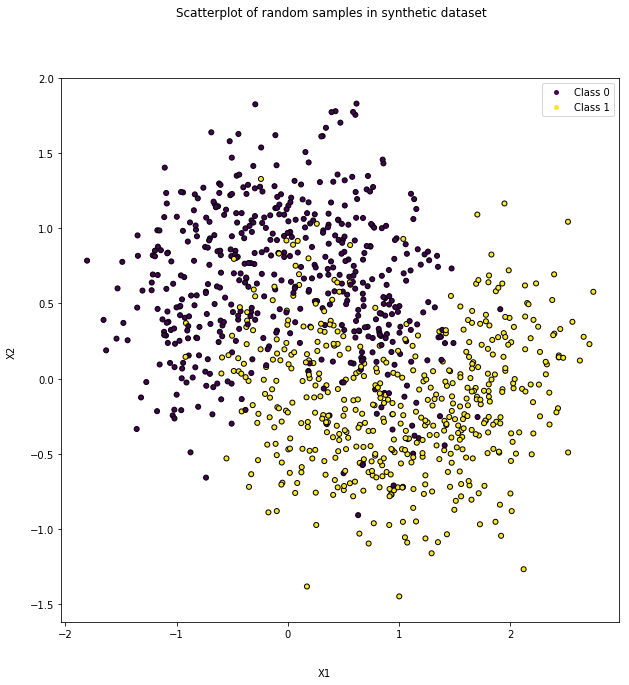

In [348]:
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# a
X,Y = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise= 0.35, random_state=35)

# b
fig = plt.figure(figsize=(10, 10))
sc = plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')
fig.suptitle('Scatterplot of random samples in synthetic dataset')
fig.text(0.5, 0.05, 'X1', ha='right')
fig.text(0.05, 0.5, 'X2', va='center', rotation='vertical')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(25), mec="none",
                        label="Class {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(Y)]
plt.legend(handles=handles)

# c
N = 100

random_indices = np.random.randint(0,X.shape[0], size = N)
X_a = X[random_indices]
Y_a = Y[random_indices]
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_a, Y_a)

random_indices = np.random.randint(0,X.shape[0], size = N)
X_b = X[random_indices]
Y_b = Y[random_indices]
knn_25 = KNeighborsClassifier(n_neighbors=25)
knn_25.fit(X_b, Y_b)

random_indices = np.random.randint(0,X.shape[0], size = N)
X_c = X[random_indices]
Y_c = Y[random_indices]
knn_50 = KNeighborsClassifier(n_neighbors=50)
knn_50.fit(X_c, Y_c)

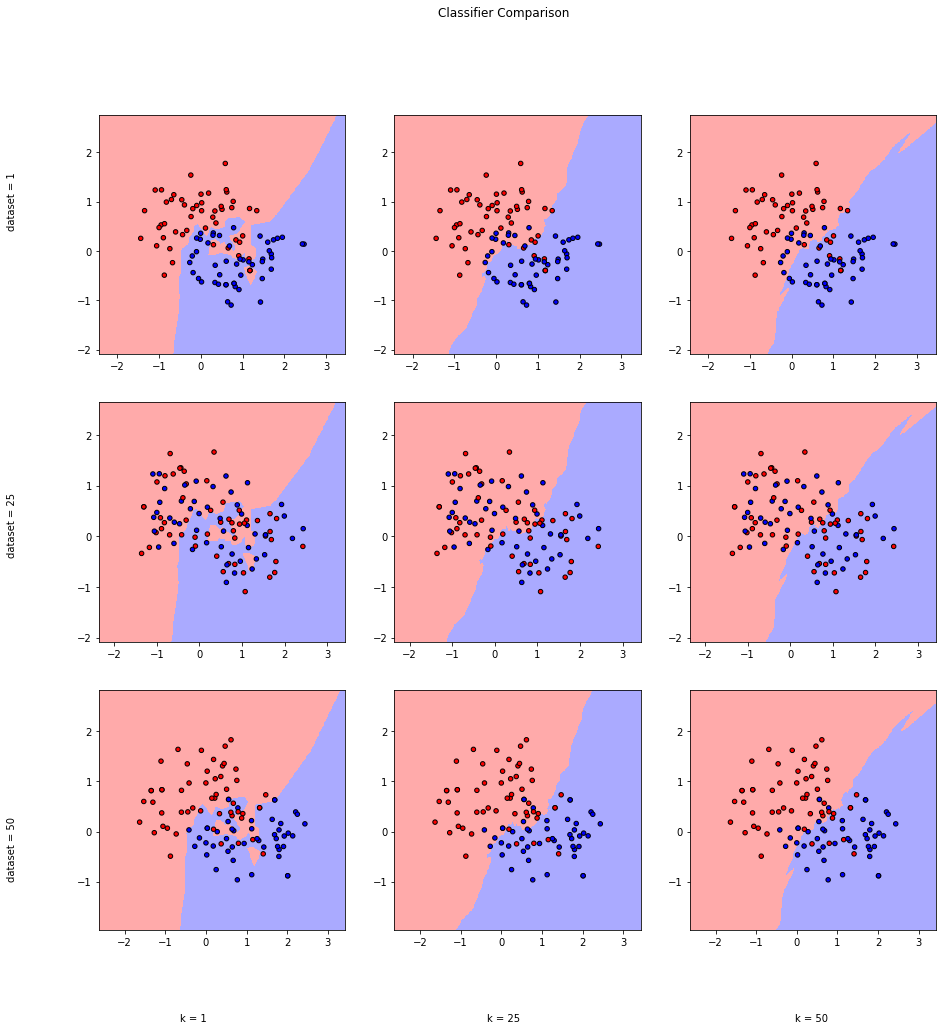

In [351]:
# d
h = .02 # step size of the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


# Set up facet plot
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Classifier Comparison')

# k = 1, d = 1
plt.subplot(3, 3, 1) 
# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_a[:, 0].min() - 1, X_a[:, 0].max() + 1
y_min, y_max = X_a[:, 1].min() - 1, X_a[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_a[:, 0], X_a[:, 1], c=Y_a, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# k = 25, d = 1
plt.subplot(3, 3, 2) 
x_min, x_max = X_a[:, 0].min() - 1, X_a[:, 0].max() + 1
y_min, y_max = X_a[:, 1].min() - 1, X_a[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn_25.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_a[:, 0], X_a[:, 1], c=Y_a, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# k = 50, d = 1
plt.subplot(3, 3, 3) 
x_min, x_max = X_a[:, 0].min() - 1, X_a[:, 0].max() + 1
y_min, y_max = X_a[:, 1].min() - 1, X_a[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn_50.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_a[:, 0], X_a[:, 1], c=Y_a, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# k = 1, d = 25
plt.subplot(3, 3, 4) 
x_min, x_max = X_b[:, 0].min() - 1, X_b[:, 0].max() + 1
y_min, y_max = X_b[:, 1].min() - 1, X_b[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_b[:, 0], X_b[:, 1], c=Y_a, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# k = 25, d = 25
plt.subplot(3, 3, 5) 
x_min, x_max = X_b[:, 0].min() - 1, X_b[:, 0].max() + 1
y_min, y_max = X_b[:, 1].min() - 1, X_b[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn_25.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_b[:, 0], X_b[:, 1], c=Y_a, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# k = 50, d = 25
plt.subplot(3, 3, 6) 
x_min, x_max = X_b[:, 0].min() - 1, X_b[:, 0].max() + 1
y_min, y_max = X_b[:, 1].min() - 1, X_b[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn_50.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_b[:, 0], X_b[:, 1], c=Y_a, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# k = 1, d = 50
plt.subplot(3, 3, 7) 
x_min, x_max = X_c[:, 0].min() - 1, X_c[:, 0].max() + 1
y_min, y_max = X_c[:, 1].min() - 1, X_c[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn_1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_c[:, 0], X_c[:, 1], c=Y_c, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# k = 25, d = 50
plt.subplot(3, 3, 8) 
x_min, x_max = X_c[:, 0].min() - 1, X_c[:, 0].max() + 1
y_min, y_max = X_c[:, 1].min() - 1, X_c[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn_25.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_c[:, 0], X_c[:, 1], c=Y_c, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# k = 50, d = 50
plt.subplot(3, 3, 9) 
x_min, x_max = X_c[:, 0].min() - 1, X_c[:, 0].max() + 1
y_min, y_max = X_c[:, 1].min() - 1, X_c[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn_50.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_c[:, 0], X_c[:, 1], c=Y_c, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

fig.text(0.2, 0.04, 'k = 1', ha='left')
fig.text(0.5, 0.04, 'k = 25', ha='center')
fig.text(0.8, 0.04, 'k = 50', ha='right')
fig.text(0.04, 0.2, 'dataset = 50', va='center', rotation='vertical')
fig.text(0.04, 0.5, 'dataset = 25', va='center', rotation='vertical')
fig.text(0.04, 0.8, 'dataset = 1', va='center', rotation='vertical')
plt.show()

## e

Between the rows (difference in dataset), we can see that our classifiers are recognizing different decision boundaries, since the data is clusted in a different way for each dataset. Between the columns, we can see the change in k (number of neighbors). From a glance, it looks like the k = 1 classifier is overfitting to the data, while our k = 50 classifier is too strict with its boundary formation.

The decision boundaries that appear to best separate the two classes of data are the ones generated by our k = 25 classifier. Our K = 1 classifier is overly flexible, thus it varies the most as our data changes. On the other end, our k = 50 classifier is not flexible enough, and doesn't change much at all as our data changes. The k = 25 classifier balances bias and variance, as the next part will answer. 


## f
As mentioned above, our K = 1 classifier is overly flexible and changes according to the data that we have, which can be seen by the first column of graphs in our figure. This indicates that this classifier has low bias but high variance. 

As we increase our number of K, our decision boundary becomes more linear, indicating a decrease in flexibility, as shown by the third column of graphs in our figure. Thus, our K = 50 classifier is overly inflexible, indicating high bias and low variance. 

Like mentioned above, this causes us to choose our K = 25 classifier, since it displays the best balance of bias and variance. The middle column of graphs in our figure shows this classifier, and how it is the balance of the two on either side. 


## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

Text(0,0.5,'Mean Error')

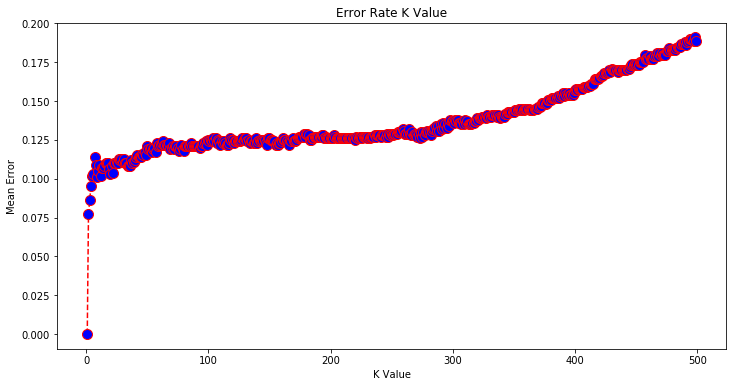

In [78]:
# a
X_test, Y_test = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise= 0.35, random_state=35)
X_train, Y_train = datasets

# b
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 500):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 500), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

## c
From our graph, we can see that as the number of neighbors increases, the mean error tends to increase as well. This rate seems to increase in margin at around 300 neighbors. The 'elbow' of the curve seems to be at around 10-20 neighbors. This trend makes sense because at a low number of neighbors, we are overfitting to the model, and as we increase in our number of neighbors, we decrease in our flexibility, which also increases our error.

## d
The lower k values represent classifiers with low bias and high variance. These overly flexible models produce lower error rates, but are generally overfitting to the data. The higher k values represent classifiers with low variance and high bias, where inflexible models have decision boundaries that are close to linear, which are too rigid and lead to high error in our predictions.

## e
The optimal value of k is somewhere around 10-20, because this is where we see the elbow in our data. At this point, we avoid some of the overfitting caused from lower k values, while still having a decision boundary that is flexible enough to make accurate predictions.

## f
In other models, the hyperparameters control the flexibility. Other examples of hyperparameters include learning rate, number of leaves in a decision tree, and number of hidden layers in a neural network.




## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [284]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

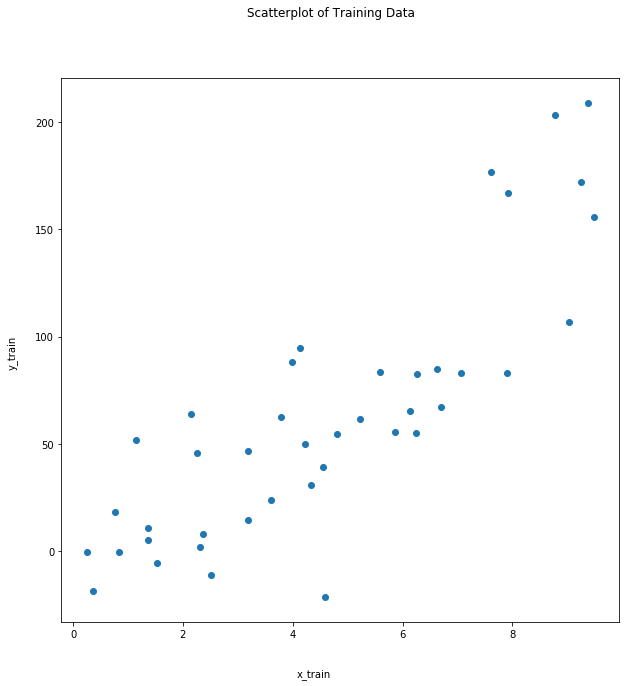

In [286]:
# a
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Scatterplot of Training Data')
fig.text(0.5, 0.05, 'x_train', ha='right')
fig.text(0.05, 0.5, 'y_train', va='center', rotation='vertical')
plt.scatter(x_train,y_train)


In [333]:
import numpy as np
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# transform to numpy arrays and reshape arrays for regression
x_train = np.asarray(x_train).reshape(-1,1)
y_train = np.asarray(y_train).reshape(-1,1)

x_test = np.asarray(x_test).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

# b 
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# predictions
y_pred = regr.predict(x_train)

print('Coefficients: \n', regr.coef_) 
print('Intercept: \n',regr.intercept_)
print('The estimated equation is: y = ' + str(float(regr.intercept_)) +' + '+ str(float(regr.coef_)) + 'x')
print('R-Squared: \n', r2_score(y_train, y_pred))
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred))

Coefficients: 
 [[18.30320685]]
Intercept: 
 [-21.73078293]
The estimated equation is: y = -21.73078292905422 + 18.303206847693165x
R-Squared: 
 0.7014590913812251
Mean squared error: 1052.59


In [336]:
# c
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(x_train, y_train)

# predictions
y_pred_poly = model.predict(x_train)
# for the plot
#y_pred_plot=np.linspace(0,1,100).reshape(-1,1)
#y_plot_poly=model.fit_transform(y_pred_plot)


print(model.named_steps.linearregression.coef_[0][1])

print('Coefficients: \n', model.named_steps.linearregression.coef_) 
print('Intercept: \n',model.named_steps.linearregression.intercept_)
print('The estimated equation is: y = ' + str(float(model.named_steps.linearregression.intercept_)) +' + '+ str(float(model.named_steps.linearregression.coef_[0][1])) + 'x ' + ' + ' + str(float(model.named_steps.linearregression.coef_[0][2])) + 'x2')
print('R-Squared: \n', r2_score(y_train, y_pred_poly))
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred_poly))

0.47100686043853135
Coefficients: 
 [[0.         0.47100686 1.83208191]]
Intercept: 
 [8.00733746]
The estimated equation is: y = 8.007337461589636 + 0.47100686043853135x  + 1.8320819097372616x2
R-Squared: 
 0.7490480719353505
Mean squared error: 884.80


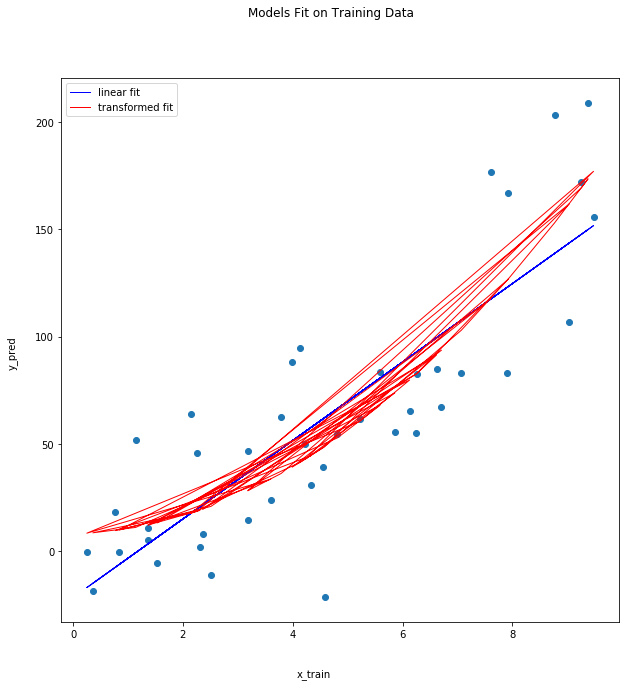

In [358]:
# d
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Models Fit on Training Data')
fig.text(0.5, 0.05, 'x_train', ha='right')
fig.text(0.05, 0.5, 'y_pred', va='center', rotation='vertical')
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred , color='blue', linewidth=1, label = 'linear fit')
plt.plot(x_train, y_pred_poly, color='red', linewidth = 1, label = 'transformed fit')
#plt.plot(x_train,y,"b.")
#plt.plot(X_plot_poly[:,0],model.predict(X_plot_poly),'-r')
plt.legend()

plt.show()

In [294]:
# e
# linear model
y_pred = regr.predict(x_test)
print('Linear Model:')
print('R-Squared: \n', r2_score(y_test, y_pred))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# non-linear model
y_pred_poly = model.predict(x_test)
print('Non-linear Model:')
print('R-Squared: \n', r2_score(y_test, y_pred_poly))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_poly))

Linear Model:
R-Squared: 
 0.5556465885794163
Mean squared error: 2023.31
Non-linear Model:
R-Squared: 
 0.6927820089560346
Mean squared error: 1398.88


## f
The non-linear model performs better on both the training data and on the test data, according to our R-squared and MSE values. This shows that a more flexible model performs better with this test dataset, but it might not be the case if the test data is significantly different form the training dataset (answered in part (g))


## g
If the test data was significantly different from our test data, then our model might perform worse than the original linear regression. This is because our more flexible model could potentially be overfitting to the training data, so it would perform better on test datasets similar to the training data but worse on test datasets that are significantly different. This is an example of the bias-variance tradeoff, since we are comparing two models that vary in flexibility. 
